In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("NBA-dataset-stats-player-team/team/team_stats_advanced_rs.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

target = "w_pct"

drop_cols = [
    "team_abbreviation", "team_name", "team_id", "team_slug",
    "w", "l", "w_pct_rank", "min_rank", "off_rtg_rank", "def_rtg_rank", "net_rtg_rank", "season"
]
df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors="ignore")

In [3]:
X = df.drop(columns=[target])
y = df[target]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"XGBoost RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

results_df = pd.DataFrame({
    'actual_w_pct': y_test,
    'predicted_w_pct': y_pred
})
print(results_df.head(10))

XGBoost RMSE: 0.024
R² Score: 0.976
     actual_w_pct  predicted_w_pct
192         0.451         0.426272
294         0.402         0.403743
168         0.744         0.775963
521         0.451         0.451098
535         0.402         0.395077
788         0.707         0.687668
591         0.500         0.491342
323         0.805         0.812437
218         0.707         0.699852
405         0.659         0.656110


In [5]:
importances = model.feature_importances_
features = X.columns

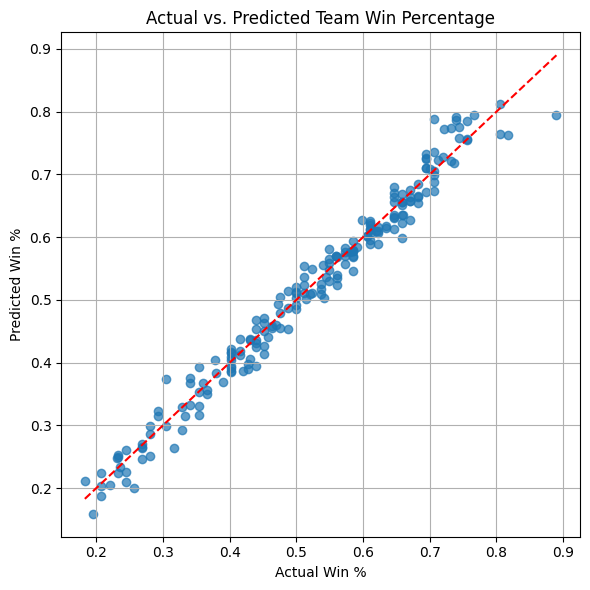

In [7]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Win %")
plt.ylabel("Predicted Win %")
plt.title("Actual vs. Predicted Team Win Percentage")
plt.grid(True)
plt.tight_layout()
plt.show()

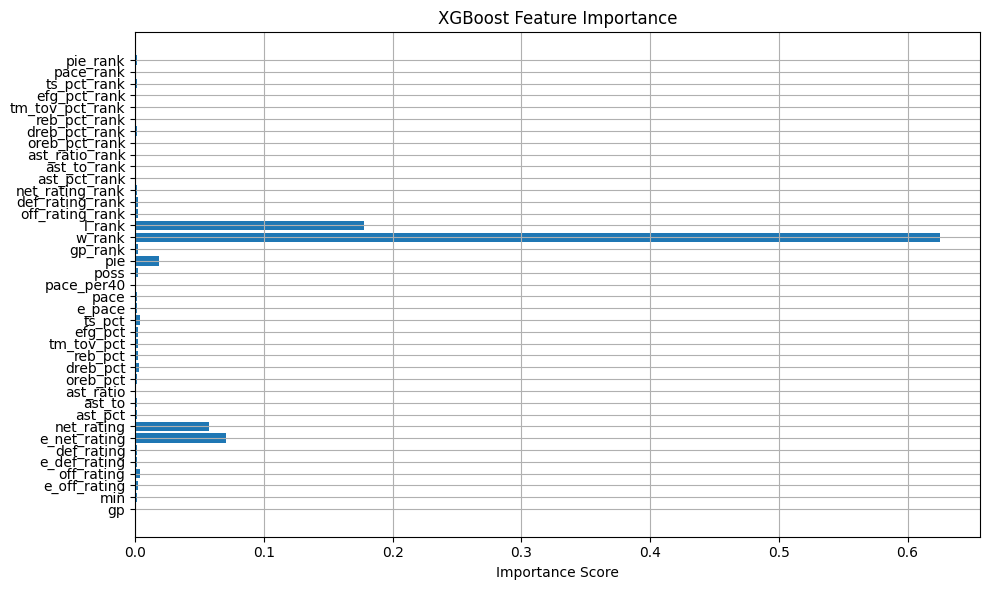

In [6]:
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.title("XGBoost Feature Importance")
plt.grid(True)
plt.tight_layout()
plt.show()